# Credit card fraud detection

My goal is to build a SVC model, which will predict whether a transaction is a fraud or not. 

Data source:
https://www.kaggle.com/mlg-ulb/creditcardfraud

Importing the necessary libraries and setting random state. 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn import svm
from sklearn.utils import resample
from sklearn.metrics import precision_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score




random_state = 27

Getting the data and pre-defining functions.

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
def print_confusion_matrix(confusion_matrix, class_names):
    df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    df.index.name = 'Actual'
    df.columns.name = 'Predicted'
    
    print(df)

class_names = ['Not fraud', 'Fraud']

## Data exploration

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
columns = list(df.columns[: -1])

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
percentage_distribution = df['Class'].value_counts(normalize=True)
percentage_distribution 

0    0.998273
1    0.001727
Name: Class, dtype: float64

### Conclusions form data exploration:

* There are no nulls, which is good, because we do not have to fill them. 
* The dataset is VERY unbalanced. This may cause problems in the model, so I will take steps to balance it out.

### Deeper exploration

In [11]:
correlations = []
significant_columns = []
for col in columns:
    corr_coeff, p_value = sci.pearsonr(df['Class'], df[col])
    correlations.append((col, corr_coeff, p_value))
    if p_value <= 0.05:  # the column is significant
        significant_columns.append(col)

correlations.sort(key=lambda x: abs(x[1]), reverse=True)

for col, corr_coeff, p_value in correlations:
    significance = "insignificant" if p_value > 0.05 else "significant"
    print(f"{col}:\n  Pearson correlation: {corr_coeff:.4f} ({significance})\n  p-value: {p_value:.4f}\n")


V17:
  Pearson correlation: -0.3265 (significant)
  p-value: 0.0000

V14:
  Pearson correlation: -0.3025 (significant)
  p-value: 0.0000

V12:
  Pearson correlation: -0.2606 (significant)
  p-value: 0.0000

V10:
  Pearson correlation: -0.2169 (significant)
  p-value: 0.0000

V16:
  Pearson correlation: -0.1965 (significant)
  p-value: 0.0000

V3:
  Pearson correlation: -0.1930 (significant)
  p-value: 0.0000

V7:
  Pearson correlation: -0.1873 (significant)
  p-value: 0.0000

V11:
  Pearson correlation: 0.1549 (significant)
  p-value: 0.0000

V4:
  Pearson correlation: 0.1334 (significant)
  p-value: 0.0000

V18:
  Pearson correlation: -0.1115 (significant)
  p-value: 0.0000

V1:
  Pearson correlation: -0.1013 (significant)
  p-value: 0.0000

V9:
  Pearson correlation: -0.0977 (significant)
  p-value: 0.0000

V5:
  Pearson correlation: -0.0950 (significant)
  p-value: 0.0000

V2:
  Pearson correlation: 0.0913 (significant)
  p-value: 0.0000

V6:
  Pearson correlation: -0.0436 (signific

The features were an outcome of the PCA, however, given that some of the correlations are insignificant I will remove them from further analysis and use only significant columns

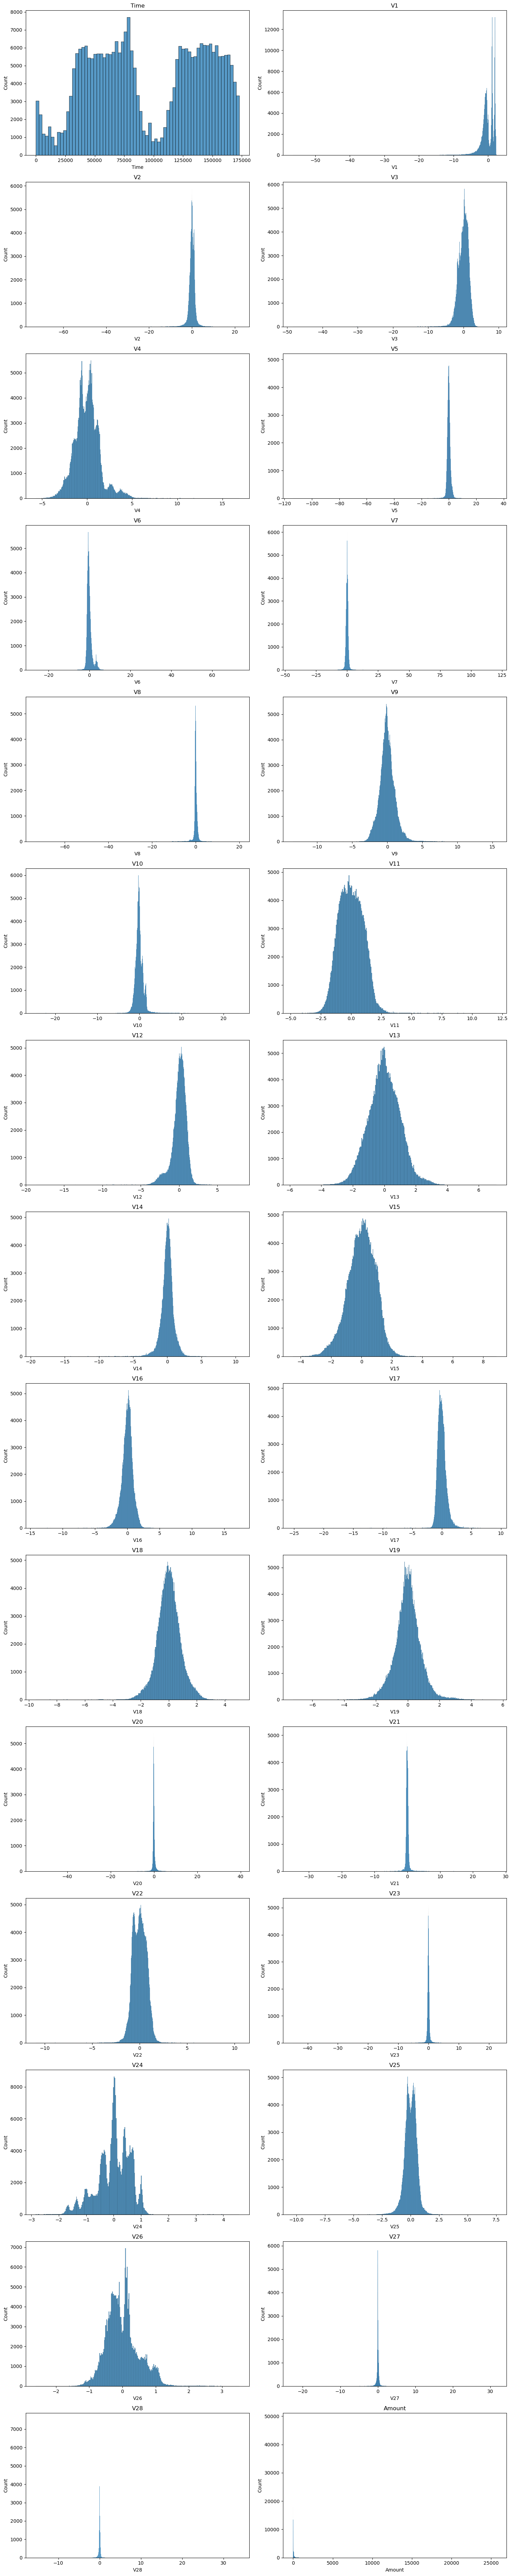

In [12]:
n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()


for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')


for i in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

# Modeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[significant_columns], df['Class'], test_size=0.2, random_state=random_state)

In [14]:
y_train.value_counts()

0    227457
1       388
Name: Class, dtype: int64

In [15]:
y_test.value_counts()

0    56858
1      104
Name: Class, dtype: int64

Resampling

Here I am balancing out the dataset.

In [16]:
X = pd.concat([X_train, y_train], axis=1)

print(X['Class'].value_counts())

# separate minority and majority classes
majority = X[X['Class']==0]
minority = X[X['Class']==1]

# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,  # sample without replacement
                                n_samples= 3 * len(minority),  # In real-life the frauds will still be a rare occasion, so I don't want my data to be 50/50
                                random_state= random_state) 


df_downsampled = pd.concat([majority_downsampled, minority])


print(df_downsampled['Class'].value_counts())
print(df_downsampled['Class'].value_counts(normalize=True))


0    227457
1       388
Name: Class, dtype: int64
0    1164
1     388
Name: Class, dtype: int64
0    0.75
1    0.25
Name: Class, dtype: float64


Scaling

In [17]:
y_train = df_downsampled['Class']
X_train = df_downsampled[significant_columns]

In [18]:
y_train.value_counts()

0    1164
1     388
Name: Class, dtype: int64

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fitting only on the training data
X_test_scaled = scaler.transform(X_test) #scaling on the full data


##### Parameter testing

I will do a little pre-selection of parameters, so the grid search will go a little faster. 

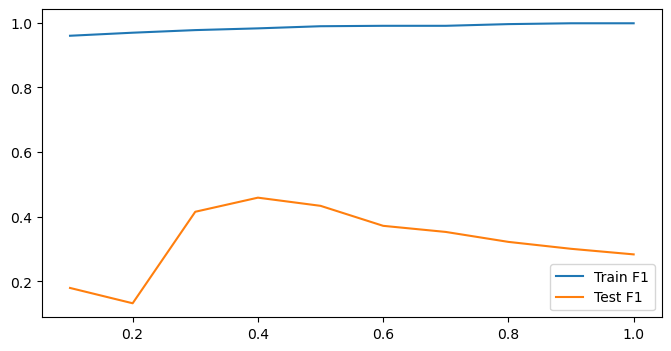

The best Gamma value for SVC is 0.4 with test F1 score of 0.459016393442623


In [21]:
gammas = np.arange(0.1, 1.1, 0.1)
train_f1 = []
test_f1 = []

for gamma in gammas:
    model = SVC(gamma=gamma, random_state=random_state).fit(X_train_scaled, y_train)
    predict_train = model.predict(X_train_scaled)
    predict_test = model.predict(X_test_scaled)
    train_f1.append(f1_score(y_train, predict_train))
    test_f1.append(f1_score(y_test, predict_test))

highest_test_f1_index = test_f1.index(max(test_f1))
best_gamma = gammas[highest_test_f1_index]

plt.figure(figsize=(8, 4))
plt.plot(gammas, train_f1, label='Train F1')
plt.plot(gammas, test_f1, label='Test F1')
plt.legend()
plt.show()

print(f"The best Gamma value for SVC is {best_gamma} with test F1 score of {test_f1[highest_test_f1_index]}")


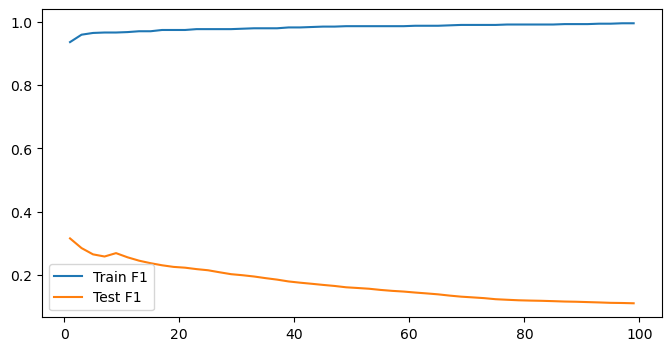

The best C value for SVC is 1 with test F1 score of 0.3154121863799283


In [22]:
Cs = range(1, 100, 2)
train_f1 = []
test_f1 = []

for C in Cs:
    model = SVC(C=C, random_state=random_state).fit(X_train_scaled, y_train)
    predict_train = model.predict(X_train_scaled)
    predict_test = model.predict(X_test_scaled)
    train_f1.append(f1_score(y_train, predict_train))
    test_f1.append(f1_score(y_test, predict_test))

highest_test_f1_index = test_f1.index(max(test_f1))
best_C = Cs[highest_test_f1_index]

plt.figure(figsize=(8, 4))
plt.plot(Cs, train_f1, label='Train F1')
plt.plot(Cs, test_f1, label='Test F1')
plt.legend()
plt.show()

print(f"The best C value for SVC is {best_C} with test F1 score of {test_f1[highest_test_f1_index]}")


### Parameter Grid search

In the case of fraud it is important to detect ac much fraud as possible. However, a lot of false positives might annoy our clients, because their payments will be disruptet. So, to keep in mind both these cases I will be using the area under the ROC curve as a scoring measure. 

In [27]:
#Finding best parameters for my model. 

param_grid = {'C': range(1, 40, 2),   #Parameters are chosen based on pre-selection above
              'gamma': np.arange(0.1, 0.6, 0.1), 
              'kernel': ['linear', 'rbf']}  

grid = GridSearchCV(svm.SVC(random_state=random_state), param_grid, refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.981 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.977 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.964 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.977 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.981 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.964 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=r

GridSearchCV(estimator=SVC(random_state=27), n_jobs=-1,
             param_grid={'C': range(1, 40, 2),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=3)

In [28]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=1, gamma=0.1, kernel='linear', random_state=27)


### Modeling on the downsampled dataset

In [38]:
model = SVC(C=3, gamma=1, kernel='linear', random_state=random_state) 
model.fit(X_train_scaled, y_train)


SVC(C=3, gamma=1, kernel='linear', random_state=27)

In [39]:
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

Assesing the model

In [40]:
cm = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix:')
print_confusion_matrix(cm, class_names)


Confusion matrix:
Predicted  Not fraud  Fraud
Actual                     
Not fraud      56419    439
Fraud             16     88


In [41]:
print(classification_report(y_train, y_pred_train)) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1164
           1       0.98      0.89      0.93       388

    accuracy                           0.97      1552
   macro avg       0.97      0.94      0.95      1552
weighted avg       0.97      0.97      0.97      1552



In [33]:
print(classification_report(y_test, y_pred_test)) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56858
           1       0.17      0.85      0.28       104

    accuracy                           0.99     56962
   macro avg       0.58      0.92      0.64     56962
weighted avg       1.00      0.99      0.99     56962



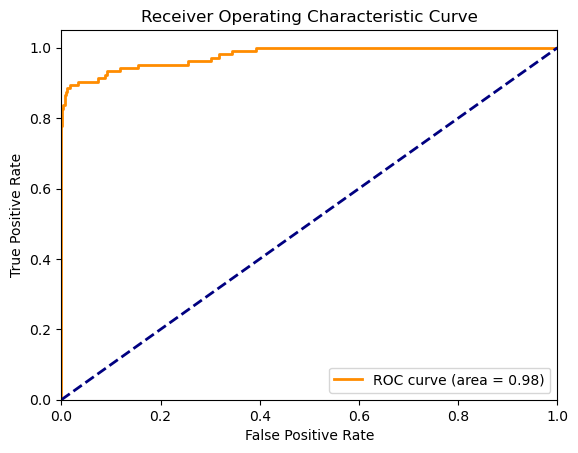

In [34]:
y_scores = model.decision_function(X_test_scaled)  
fpr, tpr, thresholds = roc_curve(y_test, y_scores)  


roc_auc = roc_auc_score(y_test, y_scores)


plt.figure()
lw = 2 
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


## Conclusions

Model has a good recall, while minimizing the false positives. Overall, it caught most of the frauds. 